In [1]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import sys

We have made the usual imports used for plotting and data handling. We have also included __sys__, which we will use just to define a constant for our upper bound while searching for the minima.

In [2]:
def simanneal(f, t, start, lr, iterations):
    bestx = start
    bestcost = sys.float_info.max
    for i in range(iterations):   
        # Generate a random value in (x-T/2, x+T/2)
        dx = (np.random.random_sample() - 0.5) * t
        x = bestx + dx
        y = f(x)
        if y < bestcost:
            bestcost = y
            bestx = x
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/t):
                bestcost = y
                bestx = x
            pass
        t = t * lr
    return bestx
    

Above is a single-function implementation of simulated annealing. It takes the following parameters:

* f, an arbitrary function
* t, the starting 'temperature'
* start, the starting point
* lr, the learning/decay rate

and should return the global minimum of the function.

The idea of simulated annealing is to help find global minima of functions having multiple critical points. We do this by first searching over a large range, and then gradually decreasing it based on how close we get to a minima. The temperature 't' is the size of the searching region at each iteration. For a higher value of temperature, we will make a larger jump in x, thus covering a larger region of values. The step-by-step method is as follows:

1. Start at some point, and from there move to a point in the interval (start - t/2, start + t/2).

2. Find the value of the function at this point. If we have improved in our search, then change the current point to this point and go to step 4.

3. In case we have __NOT__ improved, then we will accept the new point with a probability given by $$P(acceptance) = e^{-\frac{\Delta y}{lr*t}}$$ where k is the learning rate, t is temperature, and delta y is the difference in the values of the function at the given point and the least y obtained.

4. Finally, set the new temperature equal to t * lr, and return to step 1.


In [3]:
def simannealstep(f, t, current, bestcost, lr):
    # Generate a random value in (x-T/2, x+T/2)
    nextx = current
    x = current + ((np.random.random_sample() - 0.5) * 2 * t)
    y = f(x)
    if y < bestcost:
        bestcost = y
        nextx = x
    else:
        toss = np.random.random_sample()
        if toss < np.exp(-(y-bestcost)/t):
            bestcost = y
            nextx = x
        pass
    t = t * lr
    return [nextx, bestcost, t]

For the animation of the method, we have created a separate function to handle each step/frame easily. Essentially it does the same thing as the above function but only for 1 iteration. It also takes the current minimum 'y' i.e the bestcost, as an input.

In [4]:
# Defining a function with multiple minima
def testfunc(x):
    # x^2 + sin(8x)
    return x**2 + np.sin(8*x)

In [5]:
minn = sys.float_info.max
xmin = 1
for i in range(100):
    xtemp = simanneal(testfunc, 3, -3, 0.95, 10000)
    newmin = testfunc(xtemp)
    if (newmin < minn):
        minn = newmin
        xmin = xtemp
print(f"Global Minima at x = {xmin}")

Global Minima at x = -0.1905224405772901


__Since simulated annealing is somewhat random, it occasionally fails in giving us the correct global minima, converging to another local minima instead. To tackle this, we will run SA with 10k iterations for 100 runs and find the minima of the values produced from these 100 runs. This will then give us a much more accurate solution.__

In the above case, we have run it with the function x^2 + sin(8x) and obtained global minima at __x = -0.19__. An example of a run is animated below (attached as GIF), and as can be seen -0.19 is the correct value.

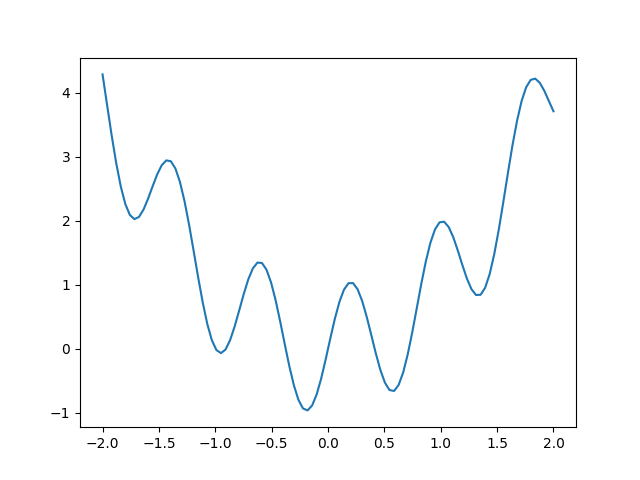

In [6]:
# Initial temperature
T = 3.0
decayrate = 0.95
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = -1
rangemin, rangemax = -2, 2 
fig, ax = plt.subplots()
xbase = np.linspace(-2, 2, 100)
ybase = testfunc(xbase)
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
def onestep(frame):
    global bestcost, bestx, decayrate, T
    next = simannealstep(testfunc, T, bestx, bestcost, decayrate)
    if (bestcost > next[1]):
        lngood.set_data(next[0], next[1])
    bestcost = next[1]
    bestx = next[0]
    T = next[2]
    xall.append(bestx)
    yall.append(bestcost)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestep, frames=range(100), interval=17, repeat=False)
plt.show()

In [7]:
# Defining a function with multiple minima
def testfunc(x):
    # x^6 - 3x^4 - x^3
    return x**6-3*x**4-x**3

In [8]:
minn = sys.float_info.max
xmin = 1
for i in range(100):
    xtemp = simanneal(testfunc, 3, -3, 0.95, 10000)
    newmin = testfunc(xtemp)
    if (newmin < minn):
        minn = newmin
        xmin = xtemp
print(f"Global Minima at x = {xmin}")

Global Minima at x = 1.5255335942489912


This time, we have performed SA with the function x^6 - 3x^4 - x^3 and obtained __global minima at 1.526__, which as can be seen below is matching with the graph.

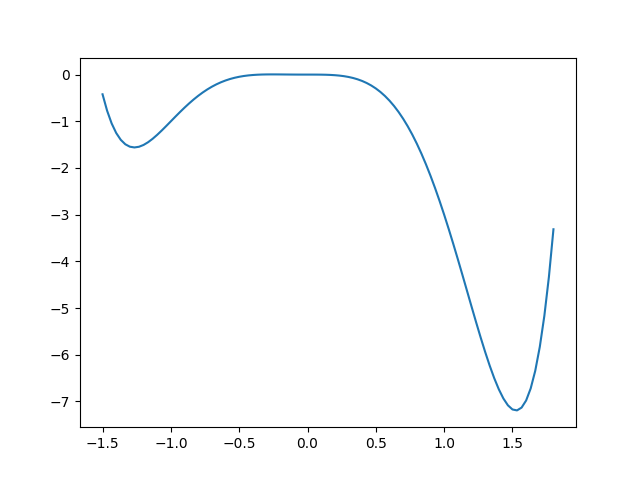

In [9]:
# Initial temperature
T = 3.0
decayrate = 0.95
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = 0
rangemin, rangemax = -1.5, 1.8 
fig, ax = plt.subplots()
xbase = np.linspace(-1.5, 1.8, 100)
ybase = testfunc(xbase)
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)
def onestep(frame):
    global bestcost, bestx, decayrate, T
    next = simannealstep(testfunc, T, bestx, bestcost, decayrate)
    if (bestcost > next[1]):
        lngood.set_data(next[0], next[1])
    bestcost = next[1]
    bestx = next[0]
    T = next[2]
    xall.append(bestx)
    yall.append(bestcost)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestep, frames=range(100), interval=10, repeat=False)
plt.show()

GIF of above animation is attached.

## Traveling Salesman Problem

In [10]:
import math
import random

In [3]:
def tsp(file, itnum, t, lr):
    x_cities = []
    y_cities = []
    num = int(file.readline().strip())
    finalorder = [i for i in range(num)]
    data = file.readlines()
    for line in data:
        line = line.split()
        x_cities.append(line[0])
        y_cities.append(line[1])
    x_cities = np.array(x_cities, dtype='float64')
    y_cities = np.array(y_cities, dtype='float64')
    finalorder = np.array(finalorder)
    x_bestorder = x_cities
    y_bestorder = y_cities
    bestdist = sys.float_info.max
    for j in range(itnum):
        ind1 = np.random.randint(0, num)
        ind2 = np.random.randint(0, num)
        x_cities[min(ind1,ind2):max(ind1,ind2)] = x_cities[min(ind1,ind2):max(ind1,ind2)][::-1]
        y_cities[min(ind1,ind2):max(ind1,ind2)] = y_cities[min(ind1,ind2):max(ind1,ind2)][::-1]
        finalorder[min(ind1,ind2):max(ind1,ind2)] = finalorder[min(ind1,ind2):max(ind1,ind2)][::-1]
        dist = 0
        for i in range(num):
            dist += (((x_cities[i] - x_cities[(i + 1) % num])**2) + ((y_cities[i] - y_cities[(i + 1) % num])**2))**0.5
        if dist < bestdist:
            bestdist = dist
            x_bestorder = np.copy(x_cities)
            y_bestorder = np.copy(y_cities)
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(dist-bestdist)/t):
                bestdist = dist
                x_bestorder = np.copy(x_cities)
                y_bestorder = np.copy(y_cities)
            else:
                x_cities[min(ind1,ind2):max(ind1,ind2)] = x_cities[min(ind1,ind2):max(ind1,ind2)][::-1]
                y_cities[min(ind1,ind2):max(ind1,ind2)] = y_cities[min(ind1,ind2):max(ind1,ind2)][::-1]
                finalorder[min(ind1,ind2):max(ind1,ind2)] = finalorder[min(ind1,ind2):max(ind1,ind2)][::-1]
                pass
        t = t * lr
    
    x_bestorder = np.append(x_bestorder, x_bestorder[0])
    y_bestorder = np.append(y_bestorder, y_bestorder[0])
    return finalorder, bestdist, x_bestorder, y_bestorder
    


Here we are given a list of cities and we must find the length of shortest path that covers every city exactly once. We will apply  __simulated annealing optimization__ for this problem and try to find the best order of cities.

The step-by-step algorithm is as follows:

1. First, we have simply read in the data from the input file and created our x and y coordinate lists for our cities. Variables like bestdist, bestorders, etc. have also been initialized.

2. Then, we will start a for loop for iterating over orders of cities.

3. __To obtain a new order, we will randomly select 2 cities and invert the order of cities between and including them. This is the crucial step that optimizes the distance of the path, commonly known as 2-opt heuristic.__

4. Then, we will calculate the length of the current path and compare it to the minimum length found so far.

5. We will apply the same criteria used previously in SA to accept/reject the current path, and multiply the temperature with the decay rate. Additionally, __if we get a better solution upon inversion of the subpath, then we accept the inversion. Else, we will not make the inversion (revert back to original order) and move on.__

6. Repeat from step 3.



[8 2 0 6 5 4 3 1 7 9] 34.076561394636684


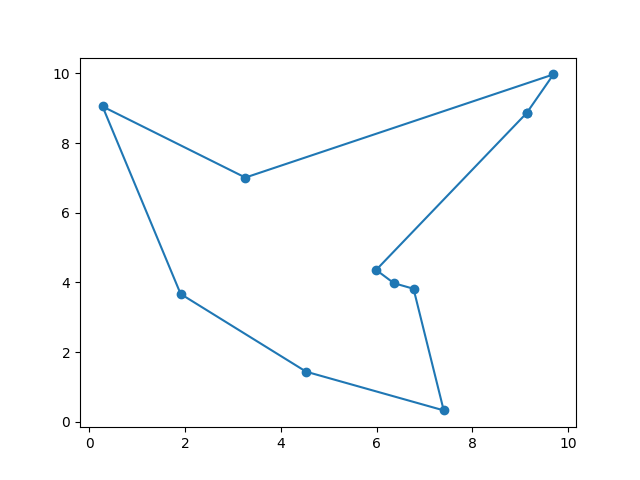

In [5]:
minn = [0,sys.float_info.max,0,0]
for i in range(100):
    with open(f'Salesman/tsp_10.txt') as f:
        newmin = tsp(f, 100, 3, 0.95)
        if (newmin[1] < minn[1]):
            minn = newmin
print(minn[0], minn[1])
plt.figure()
plt.plot(minn[2], minn[3], 'o-')
plt.show()

We have applied our function to a dataset containing 10 cities, and we have obtained the graph shown above. The distance covered by this path is __34.07__, which is the shortest path that connects all cities. Interestingly, the path forms a __closed polygon__. We will see this below as well, for the case involving 100 cities.

Again, since the distance outputted by simulated annealing is randomized, we have taken multiple runs each having 10k iterations to find the absolute minimum distance.

[ 7 27 14 93 65 52 39 15 19 30 25 86 50 42 84 12 57 72 92 87 45 56 47 51
 68 74 40 94 24 60 61 38 63 95  0 34 76 16 88 17 41  4 89  2  5 67 78 26
  8 23 13 49 48 75 58 82 46 98 85 10 62 33 32 43 79 70  1 44 81 37 11  9
 66 91 20 83 69 35 77 28 64 96 73 90 71 59 29 97 53 31 55  3 54 21 22 36
 80  6 18 99] 76.62056475127456


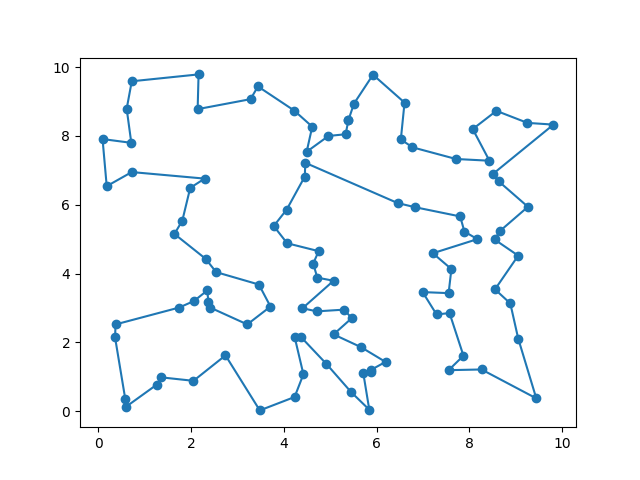

In [4]:
minn = [0,sys.float_info.max,0,0]
for i in range(10):
    with open(f'Salesman/tsp_100.txt') as f:
        newmin = tsp(f, 100000, 5, 0.9999)
        if (newmin[1] < minn[1]):
            minn = newmin
print(minn[0], minn[1])
plt.figure()
plt.plot(minn[2], minn[3], 'o-')
plt.show()

We have applied our function to a dataset containing 100 cities, and we have obtained the graph shown above. The distance covered by this path is around 76.62, which is the length of shortest path that connects all cities. Again, we get a closed polygon, which leads us to believe that the shortest path taken will generally form a closed polygon.

Running the above code may take some time (~1 min), so feel free to just perform 1 run instead of 10. Each run consists of 100k iterations.

#### NOTE: All the below cells of code take some time to run (~1 min each) since we are evaluating many different cases to obtain the graphs.

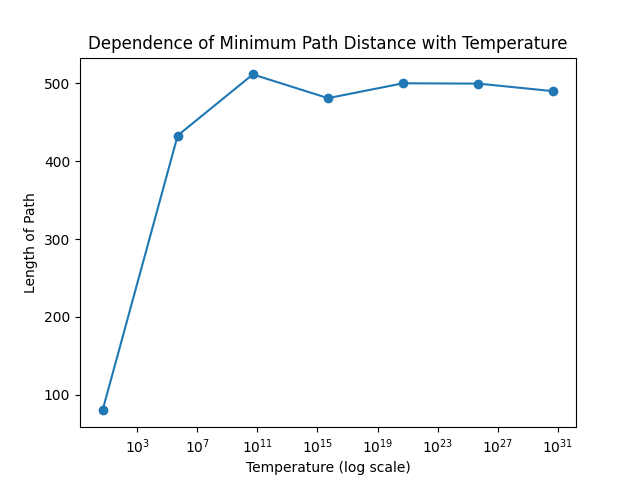

In [24]:
temps = [5, 5e5, 5e10, 5e15, 5e20, 5e25, 5e30]
tempmins = []
for T in temps:
    with open(f'Salesman/tsp_100.txt') as f:
        tempmins.append(tsp(f, 100000, T, 0.9999)[1])
plt.figure()
plt.title('Dependence of Minimum Path Distance with Temperature')
plt.xlabel('Temperature (log scale)')
plt.ylabel('Length of Path')
plt.xscale('log')
plt.plot(temps, tempmins, 'o-')
plt.show()

As can be seen, for extremely high temperatures it starts overshooting/oscillating, and thus misses any possible minima. Hence a lower temperature is better.

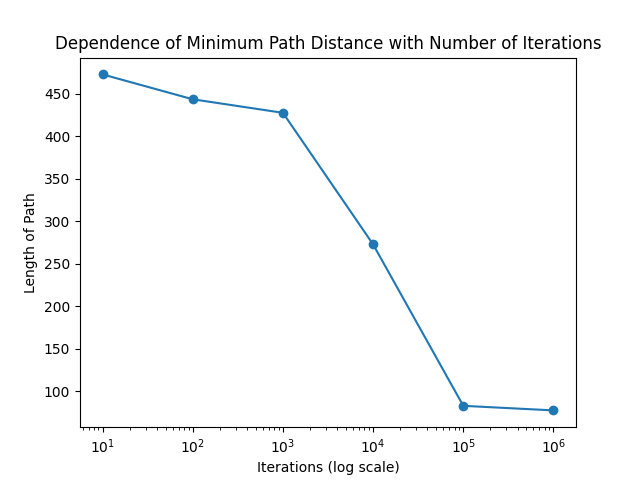

In [26]:
iters = [10, 100, 1000, 10000, 100000, 1000000]
itermins = []
for i in iters:
    with open(f'Salesman/tsp_100.txt') as f:
        itermins.append(tsp(f,i,5, 0.9999)[1])
plt.figure()
plt.title('Dependence of Minimum Path Distance with Number of Iterations')
plt.xlabel('Iterations (log scale)')
plt.ylabel('Length of Path')
plt.xscale('log')
plt.plot(iters, itermins, 'o-')
plt.show()

As expected, on increasing the number of iterations we will keep getting smaller and smaller minimum path lengths. However beyond a certain number of iterations (here 10^5) the graph will saturate since we will have already reached the lowest possible path length.

/tmp/ipykernel_704367/1001093538.py:32: RuntimeWarning: overflow encountered in scalar divide
  if toss < np.exp(-(dist-bestdist)/t):


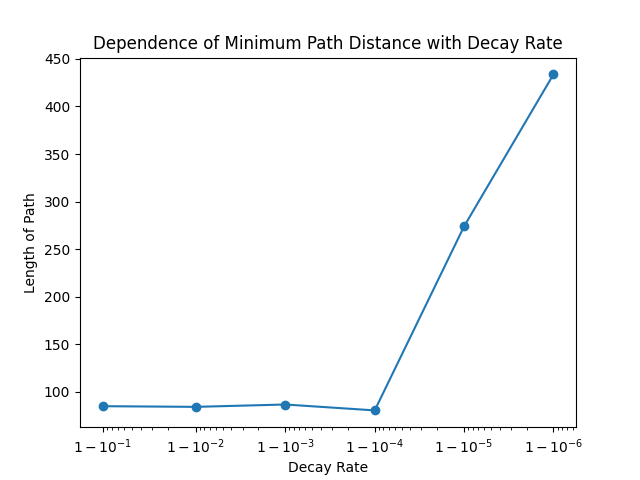

In [30]:
decayrates = [0.9, 0.99, 0.999, 0.9999, 0.99999, 0.999999]
lrmins = []

for lr in decayrates:
    with open(f'Salesman/tsp_100.txt') as f:
        lrmins.append(tsp(f, 100000, 5, lr)[1])
plt.figure()
plt.title('Dependence of Minimum Path Distance with Decay Rate')
plt.xlabel('Decay Rate')
plt.xscale('logit')
plt.ylabel('Length of Path')
plt.plot(decayrates, lrmins, 'o-')
plt.show()

NOTE: The overflow warning occurs at lower decay rates (0.9, 0.99) since the (k*t) term in the exponential power of e eventually becomes very small. We may ignore it, since it does not cause any problems.

We may explain the above graph by saying that for higher values of decay rate, the temperature starts decaying very slowly and thus stays almost constant. Due to this, we don't have enough iterations to find a low enough distance. The minimum occurs at a decay rate of 0.9999, which is what we have used for our solution.